In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

In [3]:
train = pd.read_csv('train.csv')
train

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [4]:
test = pd.read_csv('test.csv')
test

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,TEST_00003,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,TEST_00004,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,TEST_64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,TEST_64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,TEST_64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,TEST_64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [6]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [7]:
categorical = [var for var in train.columns if train[var].dtype == 'O']
print('범주형 컬럼:',categorical)

numerical = [var for var in train.columns if train[var].dtype != 'O']
print("숫자형 컬럼:", numerical)


범주형 컬럼: ['ID', '대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']
숫자형 컬럼: ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']


In [8]:
for var in train[categorical]:
    print(train[var].value_counts() / np.float(len(train)))

TRAIN_55173    0.00001
TRAIN_88889    0.00001
TRAIN_14696    0.00001
TRAIN_45808    0.00001
TRAIN_14062    0.00001
                ...   
TRAIN_03814    0.00001
TRAIN_71685    0.00001
TRAIN_74936    0.00001
TRAIN_08021    0.00001
TRAIN_78251    0.00001
Name: ID, Length: 96294, dtype: float64
 36 months    0.669606
 60 months    0.330394
Name: 대출기간, dtype: float64
10+ years    0.328006
2 years      0.087752
< 1 year     0.080732
3 years      0.078728
1 year       0.064895
Unknown      0.058893
5 years      0.058830
4 years      0.058031
8 years      0.050761
6 years      0.040231
7 years      0.039608
9 years      0.038881
10+years     0.009305
<1 year      0.003842
3            0.000924
1 years      0.000582
Name: 근로기간, dtype: float64
MORTGAGE    0.497788
RENT        0.391561
OWN         0.110640
ANY         0.000010
Name: 주택소유상태, dtype: float64
부채 통합     0.572725
신용 카드     0.254429
주택 개선     0.063971
기타        0.049068
주요 구매     0.018724
의료        0.010790
자동차       0.008277
소규모 사업   

<ipython-input-8-64a1766485ea>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(train[var].value_counts() / np.float(len(train)))


In [9]:
for var in train[categorical]:
    print(var,"contains",train[var].unique())

ID contains ['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_96291' 'TRAIN_96292'
 'TRAIN_96293']
대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
주택소유상태 contains ['RENT' 'MORTGAGE' 'OWN' 'ANY']
대출목적 contains ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']
대출등급 contains ['C' 'B' 'A' 'D' 'F' 'G' 'E']


전처리 목록

1. 근로기간에서 '< 1 year'와 '<1 year' 처럼 의미는 같지만 띄어쓰기에 따라 다른 데이터로 간주되는 부분을 모두 하나의 단위로 통합
2. 근로기간에서 'unknown' 데이터를 NAN 값으로 변환 후 대체
3. 아이디는 모델 학습에 영향이 없기에 제외

In [10]:
train.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
train.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
train.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
train.replace({'근로기간' : '3'}, '3 years', inplace=True)

train.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [11]:
train['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', nan, '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year'],
      dtype=object)

In [12]:
# 범주형 컬럼을 뽑아낸 categorical 변수에서 ID 값을 제거 

categorical.remove('ID')

In [13]:
train.isnull().sum()

ID                 0
대출금액               0
대출기간               0
근로기간            5671
주택소유상태             0
연간소득               0
부채_대비_소득_비율        0
총계좌수               0
대출목적               0
최근_2년간_연체_횟수       0
총상환원금              0
총상환이자              0
총연체금액              0
연체계좌수              0
대출등급               0
dtype: int64

In [14]:
def simple_imputation(df, column_name):
    # 결측치가 있는 열을 선택
    missing_values = df[column_name].isnull()
    
    # 결측치가 아닌 값들의 확률 분포 계산
    non_missing_values = df.loc[~missing_values, column_name]
    probabilities = non_missing_values.value_counts(normalize=True)
    
    # 결측치 대체
    imputed_values = np.random.choice(probabilities.index, size=missing_values.sum(), p=probabilities.values)
    
    # 대체된 값으로 결측치 채우기
    df.loc[missing_values, column_name] = imputed_values
    
    return df


# 단순 확률 대치법 적용
column_to_impute = '근로기간'
df = simple_imputation(train, column_to_impute)

# 결과 출력
print(df)


                ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1      TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2      TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3      TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4      TRAIN_00004  18000000   60 months    3 years      RENT   71736000   
...            ...       ...         ...        ...       ...        ...   
96289  TRAIN_96289  14400000   36 months  10+ years  MORTGAGE  210000000   
96290  TRAIN_96290  28800000   60 months  10+ years  MORTGAGE  132000000   
96291  TRAIN_96291  14400000   36 months     1 year  MORTGAGE   84000000   
96292  TRAIN_96292  15600000   36 months    5 years  MORTGAGE   66330000   
96293  TRAIN_96293   8640000   36 months  10+ years      RENT   50400000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금     총상환이자  총연체금액  \
0           

In [15]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [16]:
train.drop('ID',axis=1, inplace=True)

In [17]:
train

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,3 years,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


## Sample EDA

In [18]:
train.groupby('대출등급')['총계좌수'].sum().reset_index()

,대출등급,총계좌수
0,A,451346
1,B,726862
2,C,682152
3,D,329912
4,E,186208
5,F,49912
6,G,10311


In [19]:
train.groupby('대출등급')['대출금액'].sum().reset_index()

,대출등급,대출금액
0,A,300315990000
1,B,486087540000
2,C,494176710000
3,D,260847870000
4,E,164142240000
5,F,46906110000
6,G,10088730000


In [20]:
train['대출등급'].value_counts()

B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

In [21]:
train.groupby('대출등급')['최근_2년간_연체_횟수'].sum()

대출등급
A     3668
B    10530
C    10505
D     5133
E     2569
F      707
G      175
Name: 최근_2년간_연체_횟수, dtype: int64

array([[<AxesSubplot:title={'center':'대출금액'}>,
        <AxesSubplot:title={'center':'연간소득'}>,
        <AxesSubplot:title={'center':'부채_대비_소득_비율'}>],
       [<AxesSubplot:title={'center':'총계좌수'}>,
        <AxesSubplot:title={'center':'최근_2년간_연체_횟수'}>,
        <AxesSubplot:title={'center':'총상환원금'}>],
       [<AxesSubplot:title={'center':'총상환이자'}>,
        <AxesSubplot:title={'center':'총연체금액'}>,
        <AxesSubplot:title={'center':'연체계좌수'}>]], dtype=object)

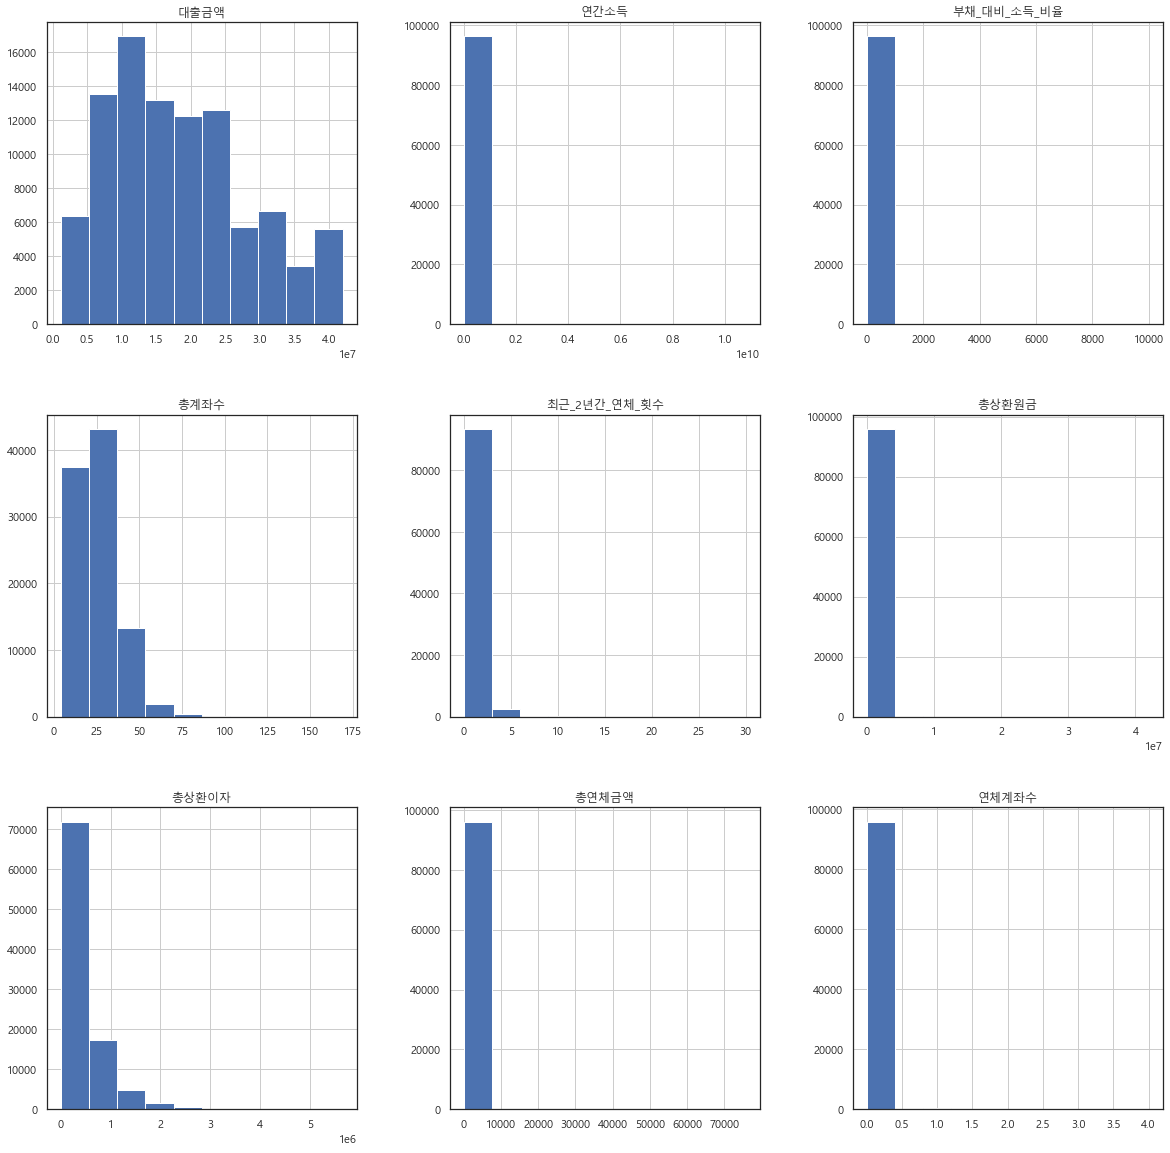

In [22]:
train.hist(figsize=(20,20))

In [23]:
# 다중공선성 확인 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# 독립 변수만 선택
independent_vars = train[numerical]

# VIF 계산
vif_result = calculate_vif(independent_vars)
print(vif_result)

       Variable       VIF
0          대출금액  6.499944
1          연간소득  2.059207
2   부채_대비_소득_비율  1.300284
3          총계좌수  3.724233
4  최근_2년간_연체_횟수  1.175073
5         총상환원금  2.039780
6         총상환이자  3.368389
7         총연체금액  1.005709
8         연체계좌수  1.023815


In [24]:
train[categorical]

,대출기간,근로기간,주택소유상태,대출목적,대출등급
0,36 months,6 years,RENT,부채 통합,C
1,60 months,10+ years,MORTGAGE,주택 개선,B
2,36 months,5 years,MORTGAGE,부채 통합,A
3,36 months,8 years,MORTGAGE,부채 통합,C
4,60 months,3 years,RENT,주요 구매,B
...,...,...,...,...,...
96289,36 months,10+ years,MORTGAGE,신용 카드,C
96290,60 months,10+ years,MORTGAGE,주택 개선,E
96291,36 months,1 year,MORTGAGE,신용 카드,A
96292,36 months,5 years,MORTGAGE,부채 통합,D


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train_categorical_column = ['대출기간', '근로기간', '주택소유상태', '대출목적']
encoder = OneHotEncoder(drop='first', sparse=False)
train_encoded = encoder.fit_transform(train[train_categorical_column])

c:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
train_encoded_rf = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(train_categorical_column))
train_encoded_rf

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96290,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
train_new = pd.concat([train_encoded_rf, train[numerical], train['대출등급']], axis=1)
train_new

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C
96290,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28800000,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E
96291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A
96292,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15600000,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,D


In [28]:
train_new.head(3)

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A


In [29]:
test_categorical = [var for var in test if test[var].dtype =='O']
test_categorical

['ID', '대출기간', '근로기간', '주택소유상태', '대출목적']

In [30]:
test_numerical = [var for var in test if test[var].dtype != 'O']
test_numerical

['대출금액',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수']

In [31]:
test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [32]:
for var in test_categorical:
    print(var,'contains',test[var].unique())

ID contains ['TEST_00000' 'TEST_00001' 'TEST_00002' ... 'TEST_64194' 'TEST_64195'
 'TEST_64196']
대출기간 contains [' 36 months' ' 60 months']
근로기간 contains ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years' '10+years' '<1 year' '3'
 '1 years']
주택소유상태 contains ['MORTGAGE' 'RENT' 'OWN']
대출목적 contains ['주택 개선' '부채 통합' '신용 카드' '기타' '주요 구매' '이사' '휴가' '소규모 사업' '주택' '의료' '자동차'
 '재생 에너지' '결혼']


In [33]:
test.replace({'근로기간' : '<1 year'}, '< 1 year', inplace=True)
test.replace({'근로기간' : '10+years'}, '10+ years', inplace=True)
test.replace({'근로기간' : '1 years'}, '1 year', inplace=True)
test.replace({'근로기간' : '3'}, '3 years', inplace=True)

test.replace({'근로기간' : 'Unknown'}, np.NaN, inplace=True)

In [34]:
test.isnull().sum()

ID                 0
대출금액               0
대출기간               0
근로기간            3862
주택소유상태             0
연간소득               0
부채_대비_소득_비율        0
총계좌수               0
대출목적               0
최근_2년간_연체_횟수       0
총상환원금              0
총상환이자              0
총연체금액              0
연체계좌수              0
dtype: int64

In [35]:
def simple_imputation(df, column_name):
    # 결측치가 있는 열을 선택
    missing_values = df[column_name].isnull()
    
    # 결측치가 아닌 값들의 확률 분포 계산
    non_missing_values = df.loc[~missing_values, column_name]
    probabilities = non_missing_values.value_counts(normalize=True)
    
    # 결측치 대체
    imputed_values = np.random.choice(probabilities.index, size=missing_values.sum(), p=probabilities.values)
    
    # 대체된 값으로 결측치 채우기
    df.loc[missing_values, column_name] = imputed_values
    
    return df


# 단순 확률 대치법 적용
column_to_impute = '근로기간'
df = simple_imputation(test, column_to_impute)

# 결과 출력
print(df)


               ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0      TEST_00000  16800000   36 months    8 years  MORTGAGE  132000000   
1      TEST_00001   8400000   36 months    5 years      RENT   89971200   
2      TEST_00002  17280000   36 months    6 years      RENT  150000000   
3      TEST_00003  14400000   36 months    5 years  MORTGAGE   66000000   
4      TEST_00004  27600000   36 months    5 years      RENT   55200000   
...           ...       ...         ...        ...       ...        ...   
64192  TEST_64192  30000000   36 months    3 years  MORTGAGE   78000000   
64193  TEST_64193  30000000   60 months  10+ years  MORTGAGE  109200000   
64194  TEST_64194   6120000   36 months  10+ years      RENT   39600000   
64195  TEST_64195  11520000   36 months  10+ years  MORTGAGE   66000000   
64196  TEST_64196   6000000   36 months    9 years      RENT  180000000   

       부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수    총상환원금      총상환이자  총연체금액  \
0            19.64    1

In [36]:
test.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [37]:
test_categorical.remove('ID')

In [38]:
test_categorical

['대출기간', '근로기간', '주택소유상태', '대출목적']

In [39]:
test.drop('ID', axis=1, inplace=True)

In [40]:
test

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,30000000,36 months,3 years,MORTGAGE,78000000,22.08,27,부채 통합,2,1307532,763380.0,0.0,0.0
64193,30000000,60 months,10+ years,MORTGAGE,109200000,12.06,26,부채 통합,0,960612,1245252.0,0.0,0.0
64194,6120000,36 months,10+ years,RENT,39600000,28.80,33,부채 통합,0,131520,80880.0,0.0,0.0
64195,11520000,36 months,10+ years,MORTGAGE,66000000,25.44,41,부채 통합,1,1339536,601872.0,0.0,0.0


In [41]:
# 독립 변수만 선택
independent_vars = test[numerical]

# VIF 계산
vif_result = calculate_vif(independent_vars)
print(vif_result)

       Variable       VIF
0          대출금액  6.446632
1          연간소득  1.834528
2   부채_대비_소득_비율  1.210139
3          총계좌수  3.637283
4  최근_2년간_연체_횟수  1.173458
5         총상환원금  2.174522
6         총상환이자  3.396429
7         총연체금액  1.005882
8         연체계좌수  1.018401


In [42]:
test_categorical_column = test_categorical
encoder = OneHotEncoder(drop='first', sparse=False)
test_encoded = encoder.fit_transform(test[test_categorical_column])

c:\Users\pc\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
test_encoded_rf = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(test_categorical_column))
test_encoded_rf

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
test_new = pd.concat([test_encoded_rf, test[test_numerical]], axis=1)
test_new

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,16800000,132000000,19.64,12,0,394692,146604.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,8400000,89971200,15.84,25,0,0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,17280000,150000000,8.41,20,0,1786980,281820.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14400000,66000000,13.72,30,1,669024,281724.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,27600000,55200000,30.50,12,0,1250052,614844.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30000000,78000000,22.08,27,2,1307532,763380.0,0.0,0.0
64193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30000000,109200000,12.06,26,0,960612,1245252.0,0.0,0.0
64194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6120000,39600000,28.80,33,0,131520,80880.0,0.0,0.0
64195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11520000,66000000,25.44,41,1,1339536,601872.0,0.0,0.0


In [45]:
from sklearn.model_selection import train_test_split

X = train_new.drop(['대출등급'], axis=1)
y = train_new['대출등급']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.preprocessing import RobustScaler, StandardScaler

scaler = RobustScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[test_numerical] = scaler.transform(X_test[test_numerical])


# 스케일러 적용 후 
X_train

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
56034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.869565,0.760870,-0.666667,-0.266667,0.0,3.101413,0.781023,0.0,0.0
20086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.008696,-1.119565,1.164733,-0.533333,0.0,-0.712769,-0.593191,0.0,0.0
43318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.173913,2.934783,-1.156999,0.866667,0.0,-0.347189,-0.369367,0.0,0.0
46440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.652174,-0.685696,0.324826,0.266667,0.0,-0.284533,-0.433175,0.0,0.0
9774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.069565,-0.434783,-0.410673,0.333333,0.0,-0.207645,0.279207,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.104348,0.163043,0.280742,1.533333,0.0,-0.279216,-0.487038,0.0,0.0
54886,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.826087,1.630435,0.400619,0.800000,0.0,0.658352,0.833368,0.0,0.0
76820,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.086957,-0.543478,-0.051044,0.133333,0.0,1.626020,0.289676,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.521739,0.826087,0.244393,3.266667,0.0,2.406650,0.716000,0.0,0.0


In [47]:
X_test

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
79749,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.173913,-0.108696,1.161640,-0.400000,0.0,-0.090251,0.324784,0.0,0.0
61621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.306522,0.021739,-0.699923,1.133333,3.0,0.192788,0.436986,0.0,0.0
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.173913,0.239130,-0.689095,-0.800000,1.0,-0.385801,-0.251889,0.0,0.0
65562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.369565,0.978261,-0.077340,0.933333,0.0,0.514488,0.517506,0.0,0.0
26735,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.347826,0.434783,-0.392885,0.400000,0.0,-0.051076,-0.138057,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50679,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.886957,-0.217391,0.035576,-0.800000,0.0,0.897559,2.908059,0.0,0.0
43079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,-0.800000,-0.440261,-0.205723,0.066667,0.0,-0.093447,-0.081983,0.0,0.0
54846,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.089130,1.021739,-1.075019,-0.600000,0.0,-0.322004,0.182308,0.0,0.0
88333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.869565,-0.065217,-0.337200,1.666667,2.0,2.024398,0.756688,0.0,0.0


In [48]:
# 랜덤포레스트 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators= 100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score_rf = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy_score_rf)

accuracy: 0.7166000311542655


In [49]:
X_train

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
56034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.869565,0.760870,-0.666667,-0.266667,0.0,3.101413,0.781023,0.0,0.0
20086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.008696,-1.119565,1.164733,-0.533333,0.0,-0.712769,-0.593191,0.0,0.0
43318,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.173913,2.934783,-1.156999,0.866667,0.0,-0.347189,-0.369367,0.0,0.0
46440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.652174,-0.685696,0.324826,0.266667,0.0,-0.284533,-0.433175,0.0,0.0
9774,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.069565,-0.434783,-0.410673,0.333333,0.0,-0.207645,0.279207,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.104348,0.163043,0.280742,1.533333,0.0,-0.279216,-0.487038,0.0,0.0
54886,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.826087,1.630435,0.400619,0.800000,0.0,0.658352,0.833368,0.0,0.0
76820,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.086957,-0.543478,-0.051044,0.133333,0.0,1.626020,0.289676,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.521739,0.826087,0.244393,3.266667,0.0,2.406650,0.716000,0.0,0.0


In [50]:
y_train_xg = y_train.replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})
y_test_xg =  y_test.replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})
y_train_xg

56034    0
20086    2
43318    1
46440    1
9774     1
        ..
6265     0
54886    1
76820    0
860      0
15795    0
Name: 대출등급, Length: 77035, dtype: int64

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

p = precision_score(y_test, y_pred, average='weighted')
r = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("precision_score:",p)
print("recall_score:",r)
print("f1_score:",f1)

precision_score: 0.7184668520455866
recall_score: 0.7166000311542655
f1_score: 0.7085394517521368


## Feature Selection 작업 진행

In [52]:
# confusion metrics 생성

from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[2448,  765,   58,    0,    0,    0,    0],
       [ 329, 4658,  805,   11,    4,    0,    0],
       [  40,  785, 4518,  138,   13,    0,    0],
       [  12,  129, 1079, 1362,  157,    3,    0],
       [   4,   35,  218,  490,  696,    5,    0],
       [   0,    7,   37,   63,  192,  117,    1],
       [   0,    0,    4,   10,   22,   42,    2]], dtype=int64)

In [53]:
print(np.round(rf.feature_importances_, 3))

[0.03  0.013 0.009 0.008 0.007 0.007 0.006 0.006 0.007 0.006 0.008 0.008
 0.006 0.007 0.007 0.002 0.01  0.002 0.001 0.001 0.    0.003 0.001 0.004
 0.001 0.103 0.096 0.103 0.084 0.02  0.211 0.22  0.001 0.001]


In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances_sort = feat_importances.sort_values(ascending=False)
feat_importances_sort

총상환이자              0.220444
총상환원금              0.210603
부채_대비_소득_비율        0.103447
대출금액               0.102679
연간소득               0.096483
총계좌수               0.084465
대출기간_ 60 months    0.030445
최근_2년간_연체_횟수       0.019776
근로기간_10+ years     0.012821
대출목적_신용 카드         0.009619
근로기간_2 years       0.008653
근로기간_3 years       0.008337
근로기간_< 1 year      0.008291
주택소유상태_MORTGAGE    0.008010
주택소유상태_RENT        0.007446
대출목적_부채 통합         0.007356
근로기간_4 years       0.007047
근로기간_5 years       0.006936
근로기간_8 years       0.006524
주택소유상태_OWN         0.006394
근로기간_6 years       0.005831
근로기간_7 years       0.005685
근로기간_9 years       0.005665
대출목적_주택 개선         0.004373
대출목적_주요 구매         0.002580
대출목적_소규모 사업        0.001953
대출목적_의료            0.001741
대출목적_자동차           0.001500
연체계좌수              0.001184
대출목적_이사            0.001038
대출목적_휴가            0.000908
대출목적_주택            0.000898
총연체금액              0.000684
대출목적_재생 에너지        0.000185
dtype: float64

In [55]:
feat_importances_sort[:10].index

Index(['총상환이자', '총상환원금', '부채_대비_소득_비율', '대출금액', '연간소득', '총계좌수',
       '대출기간_ 60 months', '최근_2년간_연체_횟수', '근로기간_10+ years', '대출목적_신용 카드'],
      dtype='object')

In [70]:
X_train_new = X_train[feat_importances_sort[:4].index]
X_test_new = X_test[feat_importances_sort[:4].index]

X_train_new

,총상환이자,총상환원금,부채_대비_소득_비율,대출금액
56034,0.781023,3.101413,-0.666667,0.869565
20086,-0.593191,-0.712769,1.164733,-1.008696
43318,-0.369367,-0.347189,-1.156999,-0.173913
46440,-0.433175,-0.284533,0.324826,-0.652174
9774,0.279207,-0.207645,-0.410673,0.069565
...,...,...,...,...
6265,-0.487038,-0.279216,0.280742,-0.104348
54886,0.833368,0.658352,0.400619,1.826087
76820,0.289676,1.626020,-0.051044,0.086957
860,0.716000,2.406650,0.244393,0.521739


In [71]:
# 랜덤포레스트 모델에 X_train_new와 X_test_new 데이터를 학습시킨 후 결과 측정

rf.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [69]:
y_pred_new = rf.predict(X_test_new)

accuracy_score_rf = accuracy_score(y_test, y_pred_new)
print("accuracy:",accuracy_score_rf)

accuracy: 0.8636481644945221


In [72]:
p = precision_score(y_test, y_pred_new, average='micro')
r = recall_score(y_test, y_pred_new, average='micro')
f1 = f1_score(y_test, y_pred_new, average='micro')

print("precision_score:",p)
print("recall_score:",r)
print("f1_score:",f1)

precision_score: 0.8636481644945221
recall_score: 0.8636481644945221
f1_score: 0.8636481644945221


### 일전에 전처리 해놓았던 test_new 데이터셋도 똑같은 피쳐만을 사용

In [60]:
test_new[numerical] = scaler.fit_transform(test_new[numerical])
test_new

,대출기간_ 60 months,근로기간_10+ years,근로기간_2 years,근로기간_3 years,근로기간_4 years,근로기간_5 years,근로기간_6 years,근로기간_7 years,근로기간_8 years,근로기간_9 years,...,대출목적_휴가,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.978240,0.067285,-0.800000,0.0,-0.270784,-0.318157,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.603448,0.216865,-0.226605,0.066667,0.0,-0.794718,-0.649044,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.034483,1.304319,-0.801237,-0.266667,0.0,1.577409,-0.012973,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-0.172414,-0.217387,-0.390565,0.400000,1.0,0.093378,-0.013190,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.775862,-0.413034,0.907193,-0.800000,0.0,0.864664,0.738665,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64192,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.948276,0.000000,0.255994,0.200000,2.0,0.940966,1.073913,0.0,0.0
64193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.948276,0.565205,-0.518948,0.133333,0.0,0.480447,2.161503,0.0,0.0
64194,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.767241,-0.695637,0.775715,0.600000,0.0,-0.620132,-0.466497,0.0,0.0
64195,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.379310,-0.217387,0.515855,1.133333,1.0,0.983449,0.709387,0.0,0.0


In [78]:
feat_importances_sort[:4].index

Index(['총상환이자', '총상환원금', '부채_대비_소득_비율', '대출금액'], dtype='object')

In [79]:
final_test_new = test_new[feat_importances_sort[:4].index]
final_test_new

,총상환이자,총상환원금,부채_대비_소득_비율,대출금액
0,-0.318157,-0.270784,0.067285,0.000000
1,-0.649044,-0.794718,-0.226605,-0.603448
2,-0.012973,1.577409,-0.801237,0.034483
3,-0.013190,0.093378,-0.390565,-0.172414
4,0.738665,0.864664,0.907193,0.775862
...,...,...,...,...
64192,1.073913,0.940966,0.255994,0.948276
64193,2.161503,0.480447,-0.518948,0.948276
64194,-0.466497,-0.620132,0.775715,-0.767241
64195,0.709387,0.983449,0.515855,-0.379310


In [63]:
from xgboost import XGBClassifier

y_train_xg = y_train.replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})
y_test_xg =  y_test.replace({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4, 'F' : 5, 'G' : 6})

xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train_new, y_train_xg) 

y_pred_xg = xg_model.predict(X_test_new)
accuracy_score_xg = accuracy_score(y_test_xg, y_pred_xg)
accuracy_score_xg

0.839088218495249

In [80]:
final_y_pred = rf.predict(final_test_new)
final_y_pred

array(['B', 'B', 'A', ..., 'D', 'C', 'A'], dtype=object)

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub['대출등급'] = final_y_pred
sub

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


### 하이퍼 파라미터 튜닝을 위해 베이지안 최적화 기법 적용

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization


def rf_objective(n_estimators, max_depth, min_samples_split, min_samples_leaf):
    # 모델 생성
    rf_model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42
    )

    # 모델 학습
    rf_model.fit(X_train_new, y_train)

    # 검증 데이터에 대한 정확도 계산 (목적 함수로 사용)
    y_pred = rf_model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# BayesianOptimization 객체 생성
rf_bo = BayesianOptimization(
    f=rf_objective,
    pbounds={
        'n_estimators': (50, 200),
        'max_depth': (1, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 5),
    },
    random_state=42,
)

# 베이지안 최적화 수행
rf_bo.maximize(init_points=5, n_iter=10, acq='ucb', kappa=2.0)

# 최적의 하이퍼파라미터 출력
best_params = rf_bo.max['params']
print("최적 하이퍼파라미터:", best_params)

# 최적의 모델을 얻어서 테스트 세트에 대한 예측 수행
best_rf_model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    random_state=42
)
best_rf_model.fit(X_train_new, y_train)
y_pred = best_rf_model.predict(X_test_new)

# 테스트 세트 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 세트 정확도: {accuracy:.4f}')

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------


<ipython-input-77-a90109a48b0b>:39: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  rf_bo.maximize(init_points=5, n_iter=10, acq='ucb', kappa=2.0)


| 1         | 0.6633    | 8.116     | 4.803     | 7.856     | 139.8     |
| 2         | 0.4108    | 3.964     | 1.624     | 2.465     | 179.9     |
| 3         | 0.8028    | 12.42     | 3.832     | 2.165     | 195.5     |
| 4         | 0.8487    | 16.82     | 1.849     | 3.455     | 77.51     |
| 5         | 0.5783    | 6.781     | 3.099     | 5.456     | 93.68     |
| 6         | 0.8253    | 14.74     | 3.672     | 3.783     | 59.58     |
| 7         | 0.3458    | 1.935     | 1.074     | 6.804     | 158.6     |
| 8         | 0.3453    | 1.085     | 1.161     | 5.732     | 102.8     |
| 9         | 0.8522    | 17.33     | 2.104     | 4.208     | 76.82     |
| 10        | 0.3453    | 1.0       | 1.0       | 10.0      | 68.27     |
| 11        | 0.8499    | 19.9      | 4.556     | 2.234     | 67.1      |
| 12        | 0.8478    | 20.0      | 5.0       | 10.0      | 50.0      |
| 13        | 0.8544    | 19.52     | 2.82      | 9.149     | 199.7     |
| 14        | 0.8497    | 20.0      | 

In [93]:
# 실행결과를 바탕으로 랜덤포레스트 모델 하이퍼파라미터 튜닝

tuning_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=9,n_estimators=200)
tuning_rf.fit(X_train_new, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=9,
                       n_estimators=200)

In [88]:
tuning_rf_pred = tuning_rf.predict(X_test_new)

array(['C', 'E', 'D', ..., 'C', 'B', 'C'], dtype=object)

In [89]:
fi = tuning_rf.predict(final_test_new)
fi

array(['B', 'B', 'A', ..., 'D', 'C', 'A'], dtype=object)

In [90]:
sub = pd.read_csv('sample_submission.csv')
sub['대출등급'] = fi
sub

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [92]:
sub.to_csv("RandomForest_parameter_tun2.csv", index=False)